# Fourier transform of the Taylor expansion

Assuming for simplicity that $D(x, y) = \omega \sin i x$

In [3]:
%matplotlib inline

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial, gamma
from scipy.signal import convolve

In [404]:
def I_num(xi, I0, D=0):
    """
    Return the local shifted spectrum,
    computed numerically.
    
    """
    xi0 = xi[:, None] - np.atleast_1d(D)[None, :]
    return np.squeeze(np.interp(xi0, xi, I0))

In [405]:
def S_num(xi, I0, wsini=0, npts=300):
    """
    Return the local disk-integrated spectrum,
    computed numerically.
    
    """
    x, y = np.meshgrid(np.linspace(-1, 1, npts), np.linspace(-1, 1, npts))
    x = x.flatten()
    y = y.flatten()
    inside = x ** 2 + y ** 2 < 1
    x = x[inside]
    y = y[inside]
    return np.sum(I_num(xi, I0, D=wsini * x), axis=-1) / len(x)

In [406]:
def S(xi, I0, wsini=0, order=10):
    """
    
    """
    # Compute the Taylor expansion in Fourier space
    dxi = xi[1] - xi[0]
    k = np.fft.rfftfreq(len(xi), dxi)
    fg = np.sum([(1 + (-1) ** n) * 0.5 * np.sqrt(np.pi) *
                 gamma(0.5 * (n + 1)) / gamma(2 + 0.5 * n) *
                 (2 * np.pi * 1j * k * wsini) ** n /
                 factorial(n) / np.pi
                 for n in range(order + 1)], axis=0)
        
    fI0 = np.fft.rfft(I0)
    res1 = np.fft.irfft(fI0 * fg)

    return res1

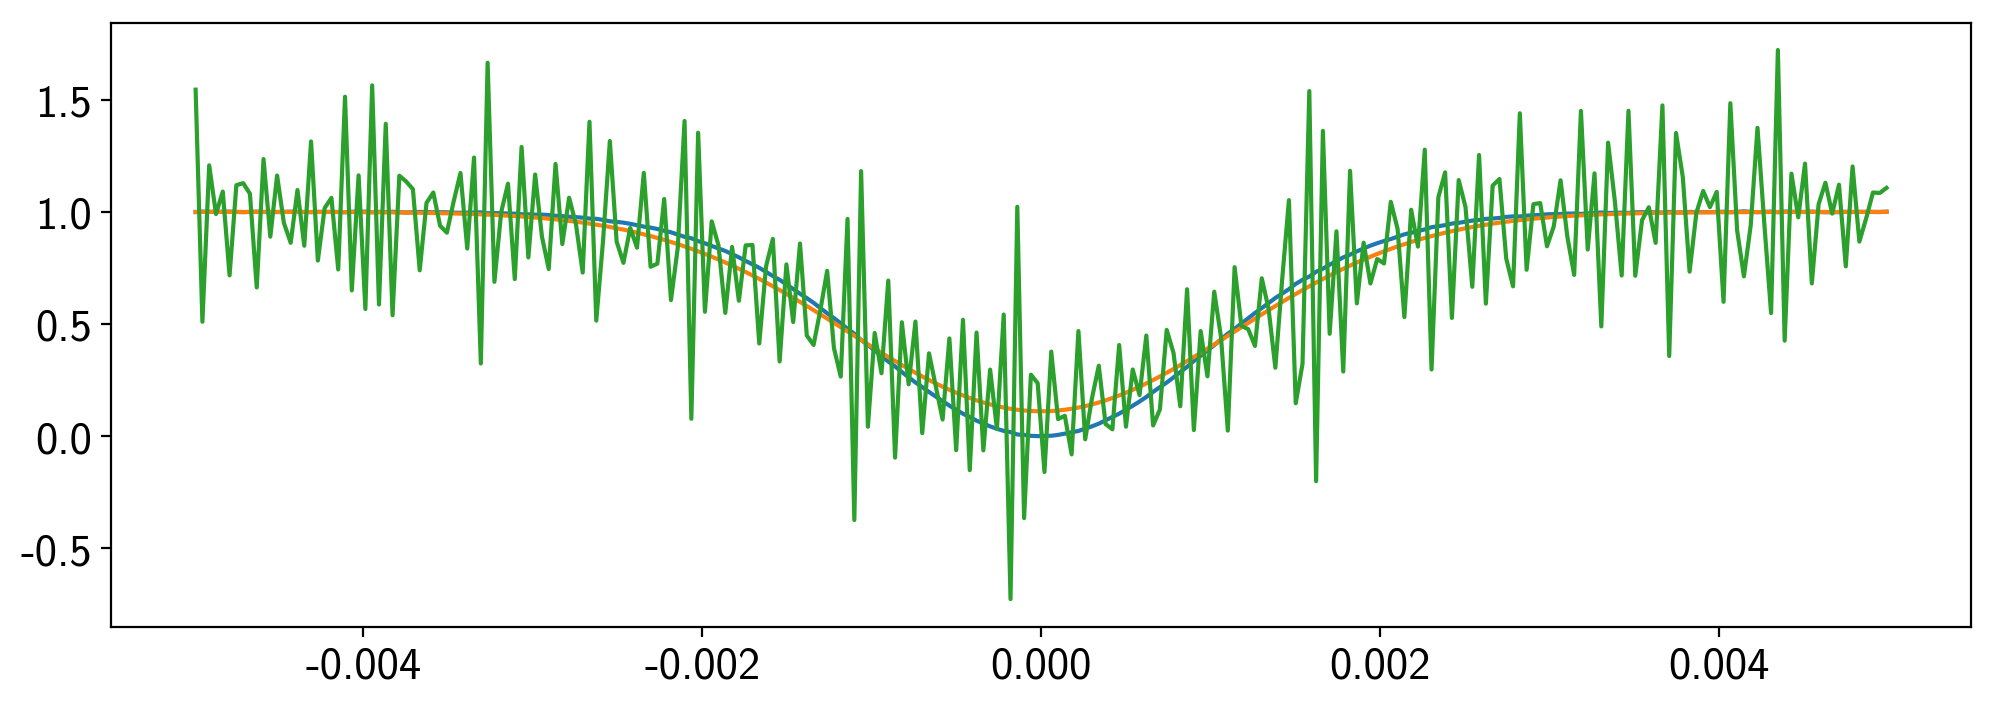

In [419]:
mu = 0.0
sigma = 0.001
amp = 1.0
npts = 500
wsini = 0.001
err = 0.001
xi = np.linspace(mu - 10 * sigma, mu + 10 * sigma, npts)
obs = np.abs(xi - mu) < 5 * sigma

I0 = 1 - amp * np.exp(-0.5 * (xi - mu) ** 2 / sigma ** 2)
I0 += err * np.random.randn(len(xi))


s = S(xi, I0, wsini, order=2)
s_num = S_num(xi, I0, wsini)


plt.plot(xi[obs], I0[obs])
plt.plot(xi[obs], s_num[obs]);
plt.plot(xi[obs], s[obs]);